In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [2]:
movie = pd.read_csv("data/movie.csv") #structure
ratings = pd.read_csv("data/rating.csv")

In [3]:
#join the two tables on movieid to have additional info in ratings table.

# Step 1: Data CLeaning

*Initial questions*

Data census?
Is data from sample?
Limitations of data? 
Aggregated/what kind of aggregation can we perform?(Granularity)

Data is not a census. It's from a random sample of users on movielens movie recomendation service.
Just from Movielens service, which could be biased in terms of customer ratings.

We can aggregate by year, month, day of week--ie on a bunch of time data.

Movie dataset

*Initial exploration(scope)*

In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie[0:100] #data seems very well formed...

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


*more questions*

1. Missing values?

In [6]:
null_rows = movie.isnull().any(axis = 1) 

In [7]:
movie[null_rows]

,movieId,title,genres


2. Missing values filled in?

In [8]:
#check for unique values movieId
movie["movieId"].value_counts()

2047      1
49085     1
85955     1
91908     1
92102     1
6088      1
8137      1
1994      1
4043      1
98443     1
126935    1
104408    1
108510    1
85987     1
98277     1
92134     1
6120      1
8169      1
2026      1
69611     1
55280     1
116722    1
59382     1
84500     1
106489    1
90049     1
104376    1
1898      1
128948    1
104312    1
         ..
72630     1
5047      1
27576     1
74641     1
119695    1
36056     1
56174     1
4951      1
27480     1
95067     1
107361    1
47970     1
101220    1
99173     1
103271    1
127851    1
115565    1
119663    1
52108     1
2932      1
885       1
7030      1
4983      1
31610     1
7336      1
86911     1
43904     1
33669     1
103303    1
131072    1
Name: movieId, Length: 27278, dtype: int64

In [9]:
#check for duplicated values that occur many times in title
movie["title"].value_counts()

Beneath (2013)                                                                                         2
War of the Worlds (2005)                                                                               2
Johnny Express (2014)                                                                                  2
Men with Guns (1997)                                                                                   2
Offside (2006)                                                                                         2
Hamlet (2000)                                                                                          2
Darling (2007)                                                                                         2
Chaos (2005)                                                                                           2
Girl, The (2012)                                                                                       2
Clear History (2013)                                   

In [10]:
#check 0, and ""
print("empty string as movie title:", movie[movie["title"] == ""].size)
print("0 as movie title: ", movie[movie["title"] == 0].size)

empty string as movie title: 0
0 as movie title:  0


In [11]:
#movie genre column
movie["genres"].value_counts()

Drama                                                     4520
Comedy                                                    2294
Documentary                                               1942
Comedy|Drama                                              1264
Drama|Romance                                             1075
Comedy|Romance                                             757
Comedy|Drama|Romance                                       605
Horror                                                     565
Crime|Drama                                                448
Drama|Thriller                                             426
Drama|War                                                  399
Horror|Thriller                                            374
Crime|Drama|Thriller                                       304
Thriller                                                   268
(no genres listed)                                         246
Western                                                

In [12]:
print("empty string as movie genre: ", movie[movie["genres"] == ""].size)
print("separator as movie genre: ",movie[movie["genres"] == "|"].size)

empty string as movie genre:  0
separator as movie genre:  0


*Faithfulness*

3. Data entered by humans?

looks machine entered.



*Additional questions for faithfulness*

Incorrect values? Data Falsification? Dependencies violated?

1. Examined earlier, saw values looked legit.
2. Data looks fine.
3. Data cannot be duplicated, primary key implies uniqueness of value yet some movies are duplicated..

In [13]:
duplicate_titles = movie[movie["title"].isin(movie["title"].value_counts()[movie["title"].value_counts() ==2].index)]
duplicate_titles

,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
823,838,Emma (1996),Comedy|Drama|Romance
1716,1788,Men with Guns (1997),Action|Drama
3507,3598,Hamlet (2000),Crime|Drama|Romance|Thriller
9135,26958,Emma (1996),Romance
9150,26982,Men with Guns (1997),Drama
10224,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
10694,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance
11205,47254,Chaos (2005),Action|Crime|Drama|Thriller
11388,48682,Offside (2006),Comedy|Drama


In [14]:
print(duplicate_titles.shape)
#movies that occur twice seem to have different movie ids, but have different genres usually not by much.
#some exceptions are Emma, and Hamlet
#Since only 16 movies with duplicate titles, just get rid of second instance.

(32, 3)


In [15]:
movie.drop_duplicates(subset= "title", inplace = True)

Ratings Dataset

*Initial exploration(scope)*

In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [17]:
ratings[0:100]

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [18]:
#everything looks well formed, except userid repeats 100 times...check to see if thats correct...
ratings["userId"].value_counts()
#It looks like users really like to rate movies. I guess it's correct.

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
130767    4785
79159     4707
8963      4524
15617     4354
92011     4236
71975     4182
20132     4101
46470     4094
88820     4093
63147     3958
130459    3908
120575    3864
9544      3804
31122     3742
18611     3739
125978    3662
18138     3650
91193     3637
111549    3609
68026     3602
          ... 
124891      20
67489       20
83827       20
67451       20
1884        20
14744       20
31120       20
75755       20
18283       20
121892      20
42944       20
116575      20
105519      20
23568       20
14739       20
67408       20
39943       20
83804       20
10201       20
75769       20
138322      20
89146       20
92146       20
105507      20
18290       20
59390       20
23558       20
34668       20
80291       20
58028       20
Name: userId, Length: 138493, dtype: int64

*more questions*

1. Missing values?

In [19]:
null_rows = ratings.isnull().any(axis = 1) 

In [20]:
ratings[null_rows]

,userId,movieId,rating,timestamp


2. Missing values filled in?

In [21]:
#check for 0, in userId
print("ratings with 0 as userId: ",ratings[ratings["userId"] == 0].size)

ratings with 0 as userId:  0


In [22]:
#check for 0, in movieid
print("ratings with 0 as movieId: ",ratings[ratings["movieId"] == 0].size)

ratings with 0 as movieId:  0


In [23]:
#check for unique combo of userId, Movieid
ratings.groupby(["userId", "movieId"]).size().reset_index(name = "count").sort_values(by = 'count', ascending = False)

,userId,movieId,count
0,1,2,1
13333506,92142,41997,1
13333513,92142,44191,1
13333512,92142,44022,1
13333511,92142,43928,1
13333510,92142,43836,1
13333509,92142,43376,1
13333508,92142,42718,1
13333507,92142,42018,1
13333505,92142,41721,1


In [24]:
#check for funny values of rating...I guess only doubles so we're good.
#and all ratings btwn 0, and 5 check.
ratings["rating"].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [25]:
#look at timestamp now.
#convert timestamp to datetime object. 
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], format = "%Y-%m-%d")

In [26]:
print("NA ratings: ",ratings[ratings["timestamp"].isna()].size)
print(ratings["timestamp"].sort_values(ascending = True))
#no null ratings
#no out of wack dates...ie no dates in 1970...

NA ratings:  0
4182421    1995-01-09 11:46:44
18950979   1995-01-09 11:46:49
18950936   1995-01-09 11:46:49
18950930   1995-01-09 11:46:49
12341178   1996-01-29 00:00:00
12341168   1996-01-29 00:00:00
12341169   1996-01-29 00:00:00
12341170   1996-01-29 00:00:00
12341173   1996-01-29 00:00:00
12341174   1996-01-29 00:00:00
12341175   1996-01-29 00:00:00
12341180   1996-01-29 00:00:00
12341181   1996-01-29 00:00:00
12341184   1996-01-29 00:00:00
12341186   1996-01-29 00:00:00
3056639    1996-01-29 00:00:00
19424627   1996-01-29 00:00:00
19424626   1996-01-29 00:00:00
14452515   1996-01-29 00:00:00
19424624   1996-01-29 00:00:00
12341167   1996-01-29 00:00:00
12341165   1996-01-29 00:00:00
12341162   1996-01-29 00:00:00
12341163   1996-01-29 00:00:00
7754002    1996-01-29 00:00:00
14452517   1996-01-29 00:00:00
14452516   1996-01-29 00:00:00
14452507   1996-01-29 00:00:00
14452506   1996-01-29 00:00:00
14452505   1996-01-29 00:00:00
                   ...        
17877748   2015-03-31 05

*Faithfulness*

3. Data entered by humans?

looks machine entered.



*Additional questions for faithfulness*

Incorrect values? Data Falsification? Dependencies violated?

1. Examined earlier, saw values looked legit.
2. Data looks fine.
3. Dependencies seem fine.

In [27]:
merged_ratings = ratings.merge(movie, how = 'inner')

In [28]:
np.random.seed(seed=69)

In [29]:
merged_ratings["userId"]

0                1
1                5
2               13
3               29
4               34
5               54
6               88
7               91
8              116
9              119
10             120
11             124
12             127
13             128
14             129
15             131
16             132
17             137
18             142
19             152
20             156
21             158
22             164
23             165
24             170
25             184
26             220
27             232
28             235
29             238
             ...  
19999655    136015
19999656    136015
19999657    136054
19999658    136196
19999659    136268
19999660    136268
19999661    136268
19999662    136571
19999663    136684
19999664    137031
19999665    137031
19999666    137031
19999667    137277
19999668    137717
19999669    137717
19999670    137717
19999671    137717
19999672    137893
19999673    137893
19999674    138301
19999675    138301
19999676    

In [49]:
def srs(df,n, k):
    index = np.random.choice(n,size = k, replace = False)
    return df.iloc[index]

In [52]:
smaller = srs(merged_ratings, 1000000-1,100000)

In [58]:
np.split?

In [94]:
a = [1,2]
b = [3,4]
c = [5,6]
d = [7,8]

[(1, 3, 5, 7), (2, 4, 6, 8)]

In [87]:
very_small = srs(merged_ratings, 1000000-1,10)

In [105]:
dfbyuser = [g for _, g in very_small.groupby("userId")]
train_test = [np.split(subdf, [int(.8*subdf.shape[0])]) for subdf in dfbyuser]
train_test = list(zip(*train_test))
train_test = [pd.concat(listofdf) for listofdf in train_test]

In [42]:
def train_test_split(ratings):
    ratings.sort_values(['timestamp'], inplace = True)
    train, test = pd.DataFrame(), pd.DataFrame()
    for user in ratings["userId"].unique():
            user_df = ratings[ratings["userId"] == user]
            user_train = user_df.iloc[int(user_df.shape[0]*.8),:]
            user_test = user_df[~user_df.isin(user_train).all(1)]
            train = pd.concat([train, user_train])
            test = pd.concat([train,user_test])
    return (train, test)

In [43]:
train, test = train_test_split(merged_ratings)

C:\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


KeyboardInterrupt: 

# STEP 2 EDA

In [34]:
#How does genre affect rating?
#Timestamp of rating affect rating?
#Timestamp of movie affect rating?

In [35]:
#number of uniques genres
train["genres"].value_counts().size

891

In [36]:
#add dummy columns for the different genres.
train = pd.concat([train, train["genres"].str.get_dummies()], axis = 1)

In [37]:
train.columns[6:].to_series().values


array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

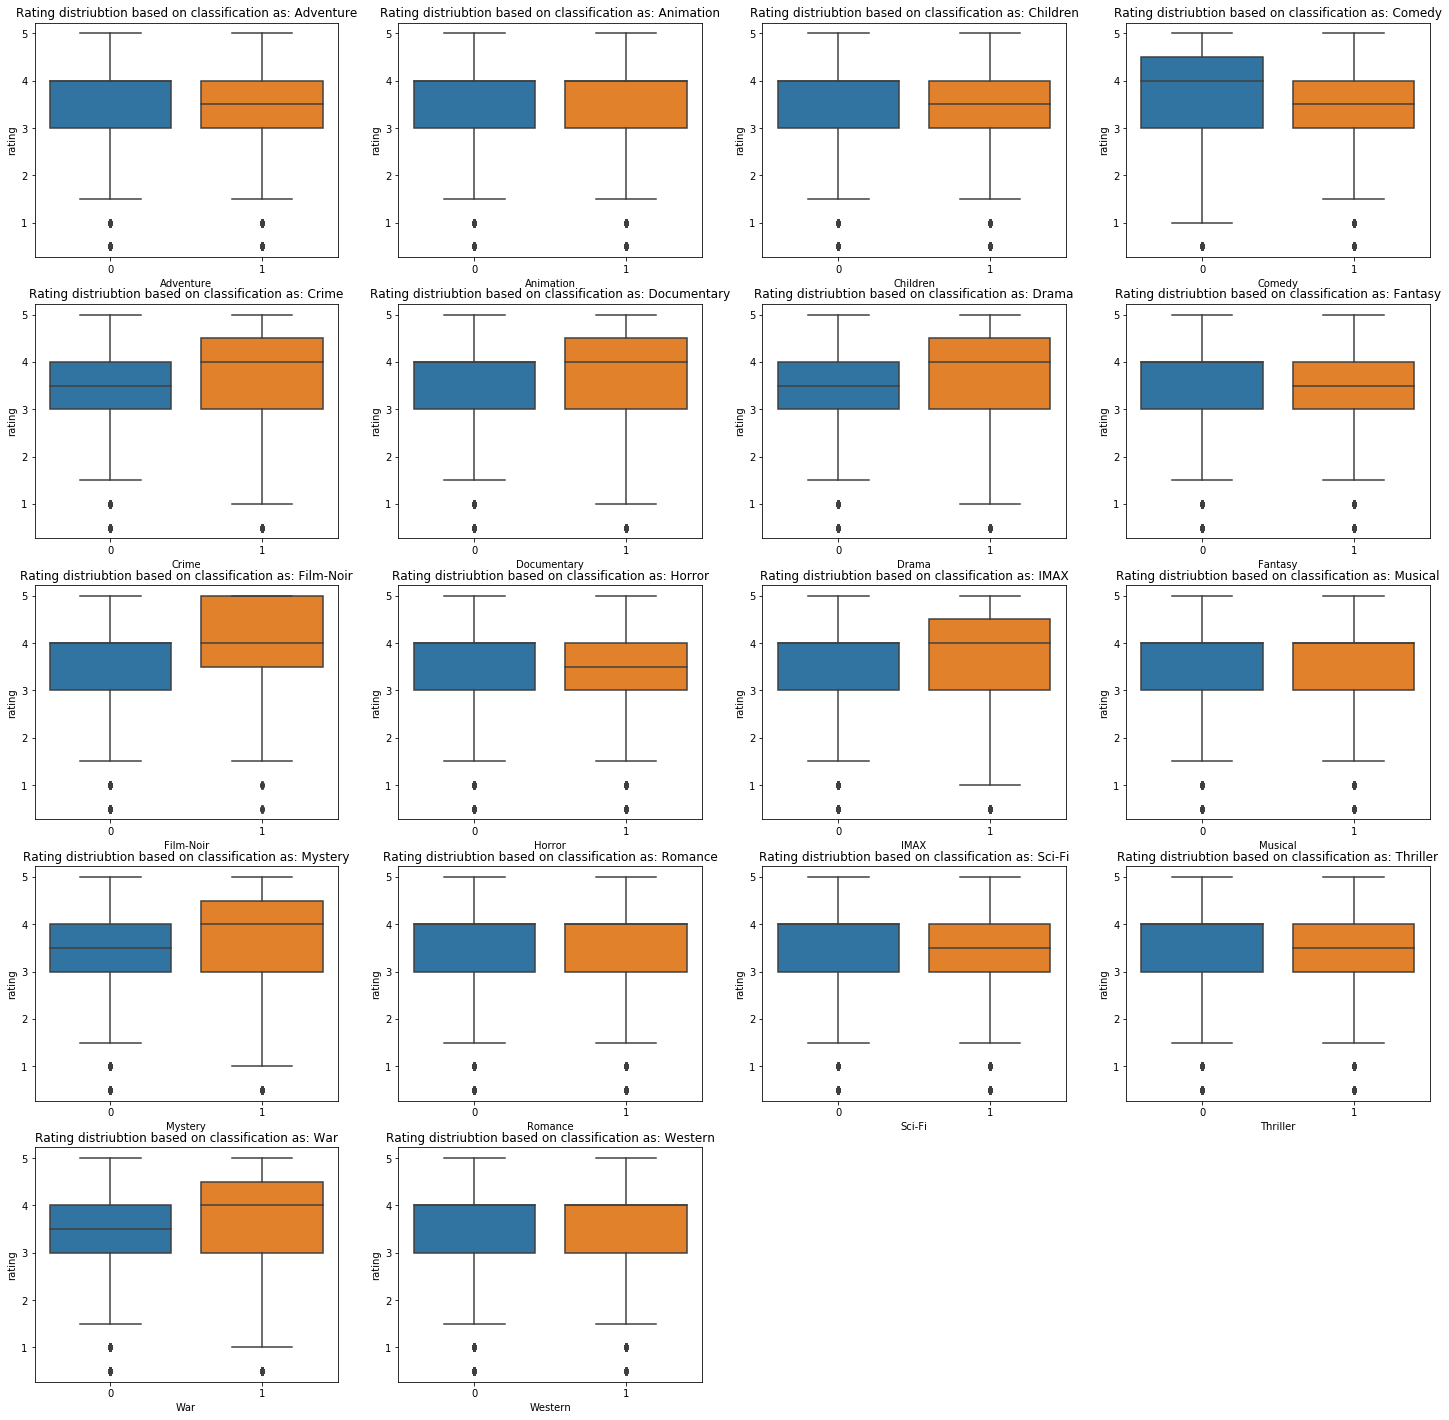

In [38]:
plt.figure(figsize = (25,25))

genres = train.columns[6:].to_series().values
for i in np.arange(1,genres.size):
    plt.subplot(5,4,i)
    sns.boxplot(x = genres[i] , y = "rating", data = train)
    plt.title("Rating distriubtion based on classification as: " + genres[i])

In [39]:
####

*Timestamp effect on rating*

In [40]:
#year? month? week?

Text(0.5,1,'How rating depends on year of rating')

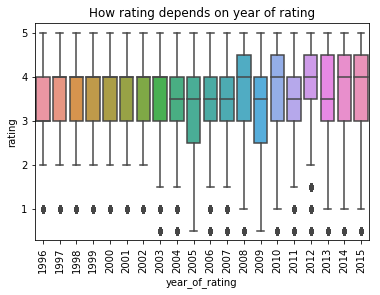

In [41]:
train["year_of_rating"] = train["timestamp"].dt.year
sns.boxplot(x ="year_of_rating",y ="rating", data = train)
plt.xticks(rotation = 90)
plt.title("How rating depends on year of rating")
#@TONY TONY....why no median over here bro? I really don't know man lol...

Text(0.5,1,'How rating depends on month of rating')

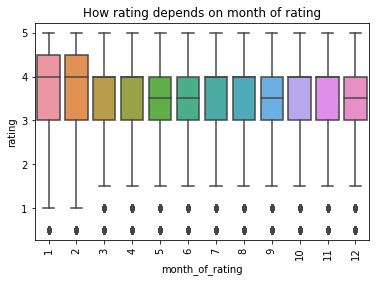

In [42]:
train["month_of_rating"] = train["timestamp"].dt.month
sns.boxplot(x ="month_of_rating",y ="rating", data = train)
plt.xticks(rotation = 90)
plt.title("How rating depends on month of rating")

Text(0.5,1,'How rating depends on week of rating')

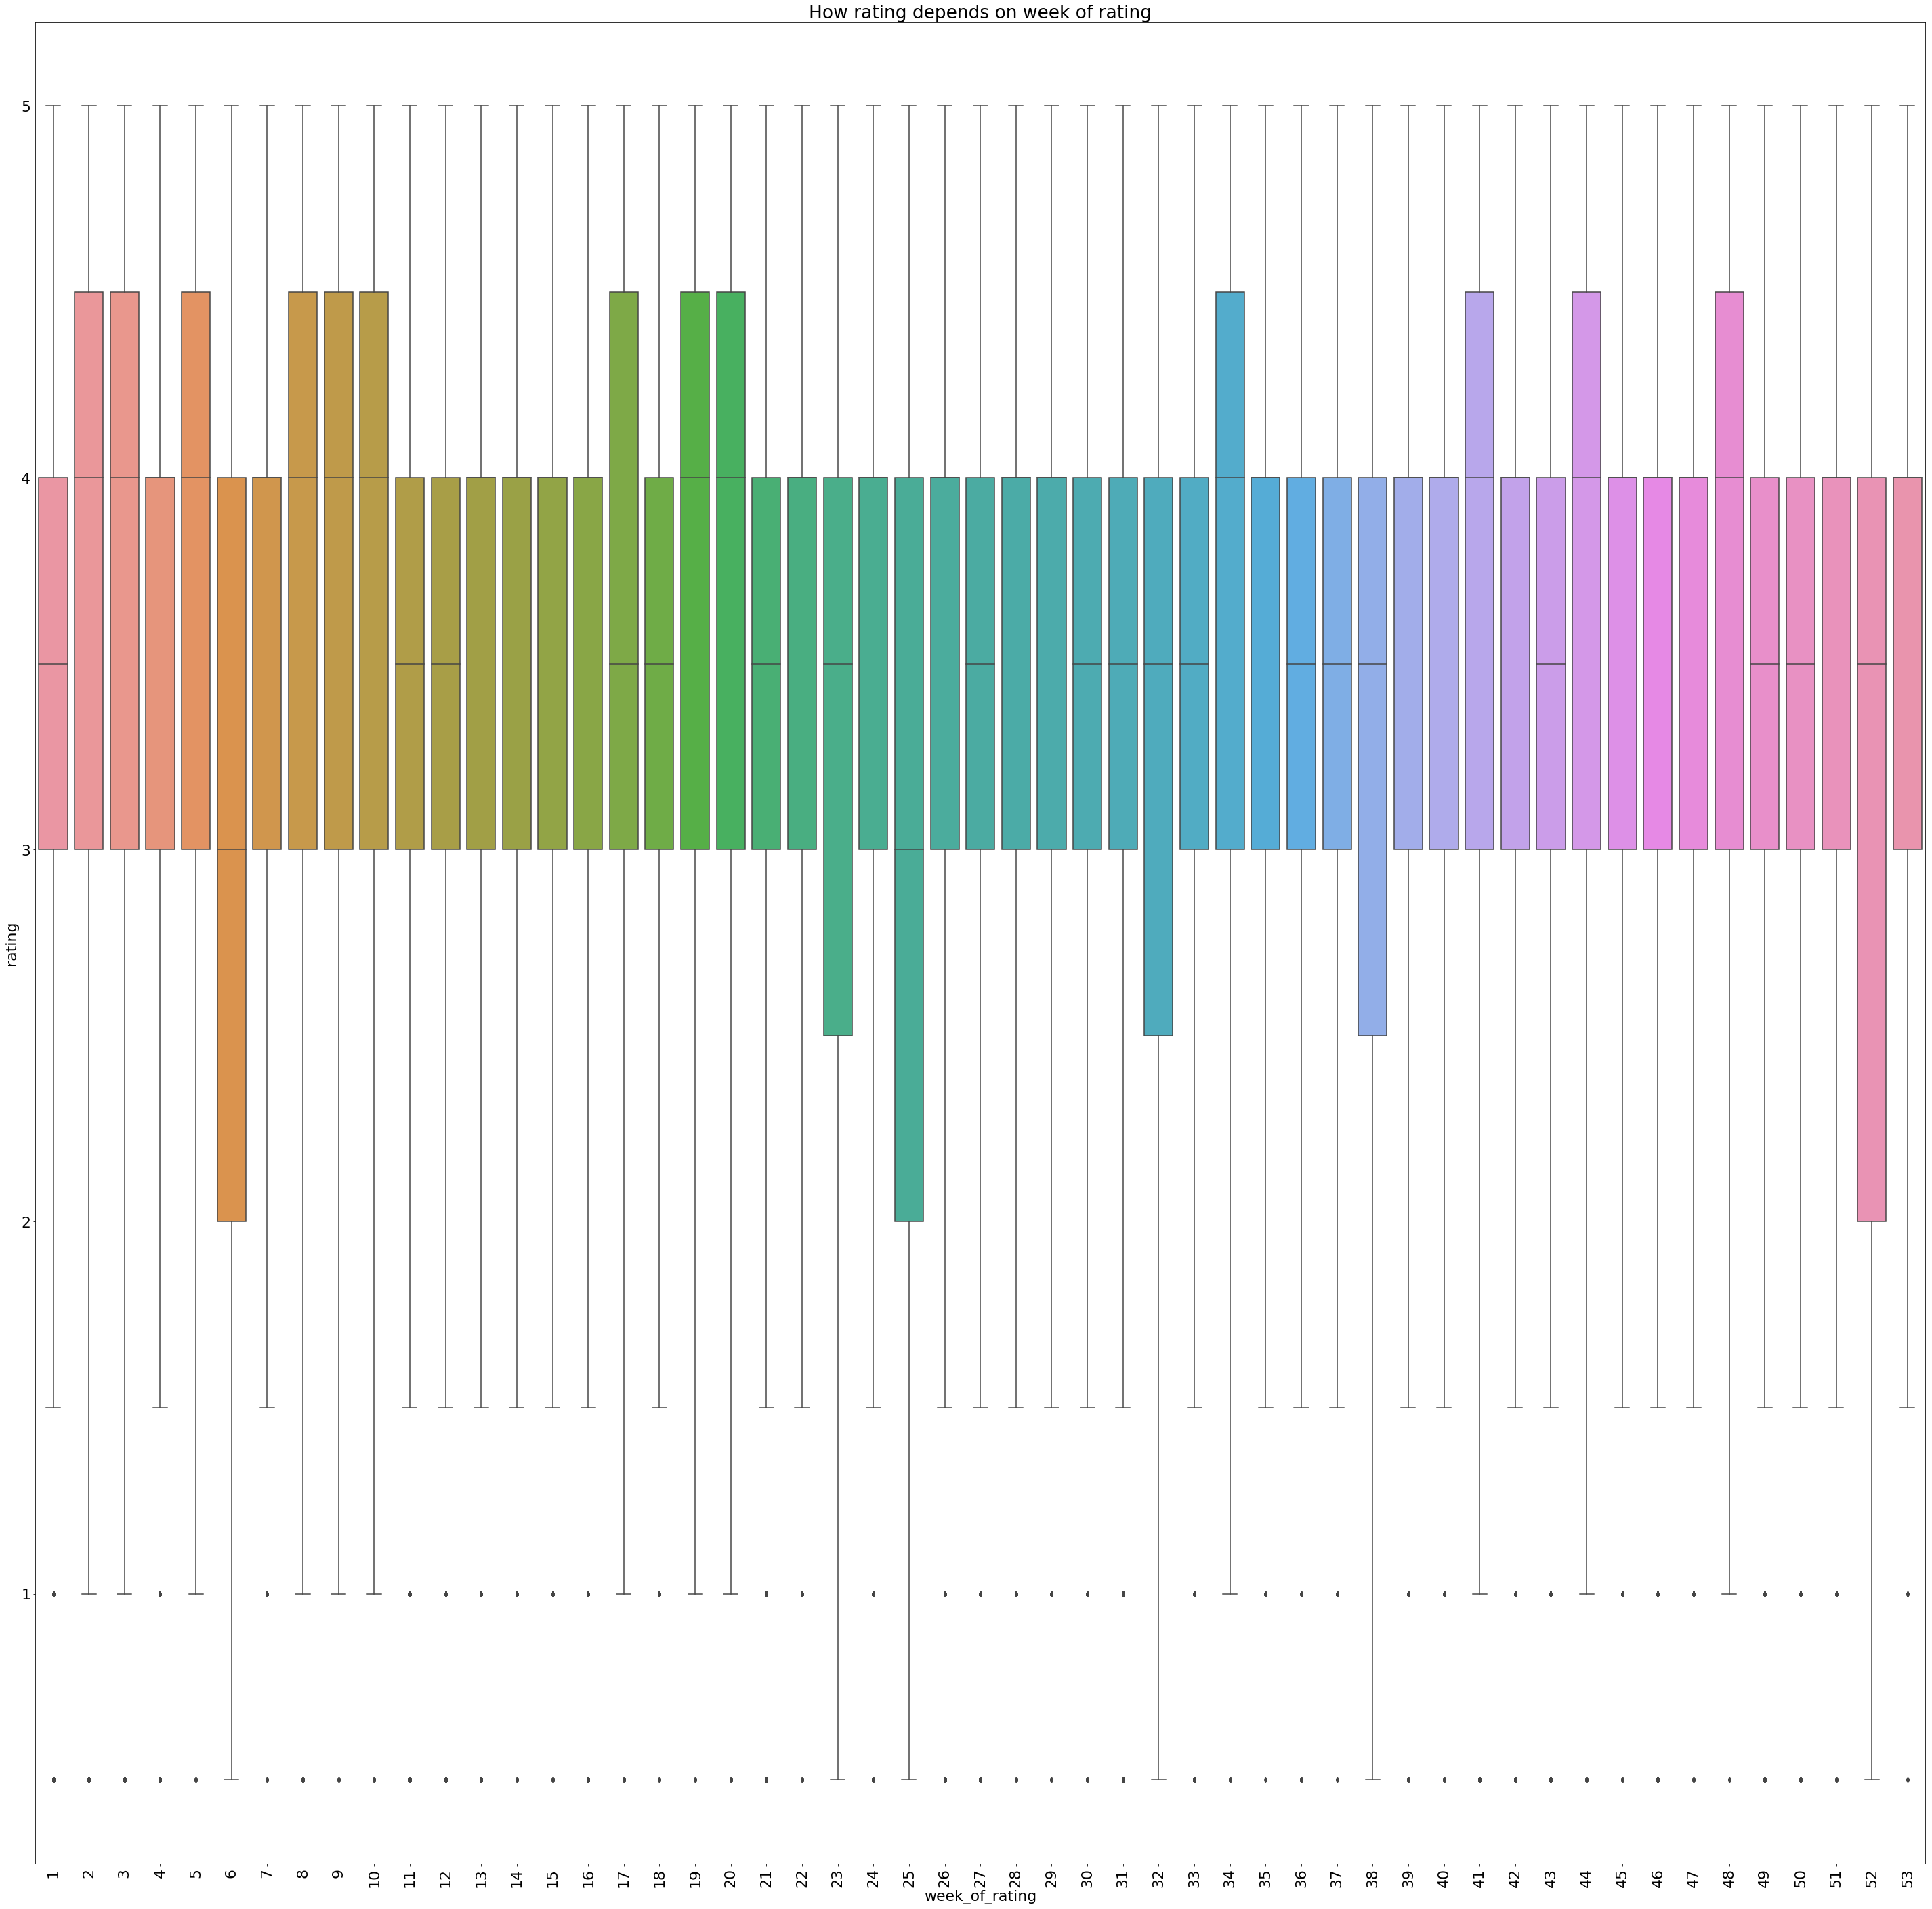

In [43]:
plt.figure(figsize = (50,50))
plt.rcParams.update({'font.size':22})
train["week_of_rating"] = train["timestamp"].dt.weekofyear
sns.boxplot(x ="week_of_rating",y ="rating", data = train)
plt.xticks(rotation = 90)
plt.title("How rating depends on week of rating")

*timestamp of movie affect on rating*

In [44]:
train["year_released"] = train["title"].str.extract("\((\d{4})\)")

In [45]:
train["title"]

44                                             Jumanji (1995)
259                                            Jumanji (1995)
385                                            Jumanji (1995)
452                                            Jumanji (1995)
589                                            Jumanji (1995)
1130                                           Jumanji (1995)
2297                                           Jumanji (1995)
2651                                           Jumanji (1995)
2767                                           Jumanji (1995)
2853                                           Jumanji (1995)
3087                                           Jumanji (1995)
3497                                           Jumanji (1995)
3519                                           Jumanji (1995)
3605                                           Jumanji (1995)
3712                                           Jumanji (1995)
3823                                           Jumanji (1995)
3948    

Text(0.5,1,'How rating depends on year of movie release')

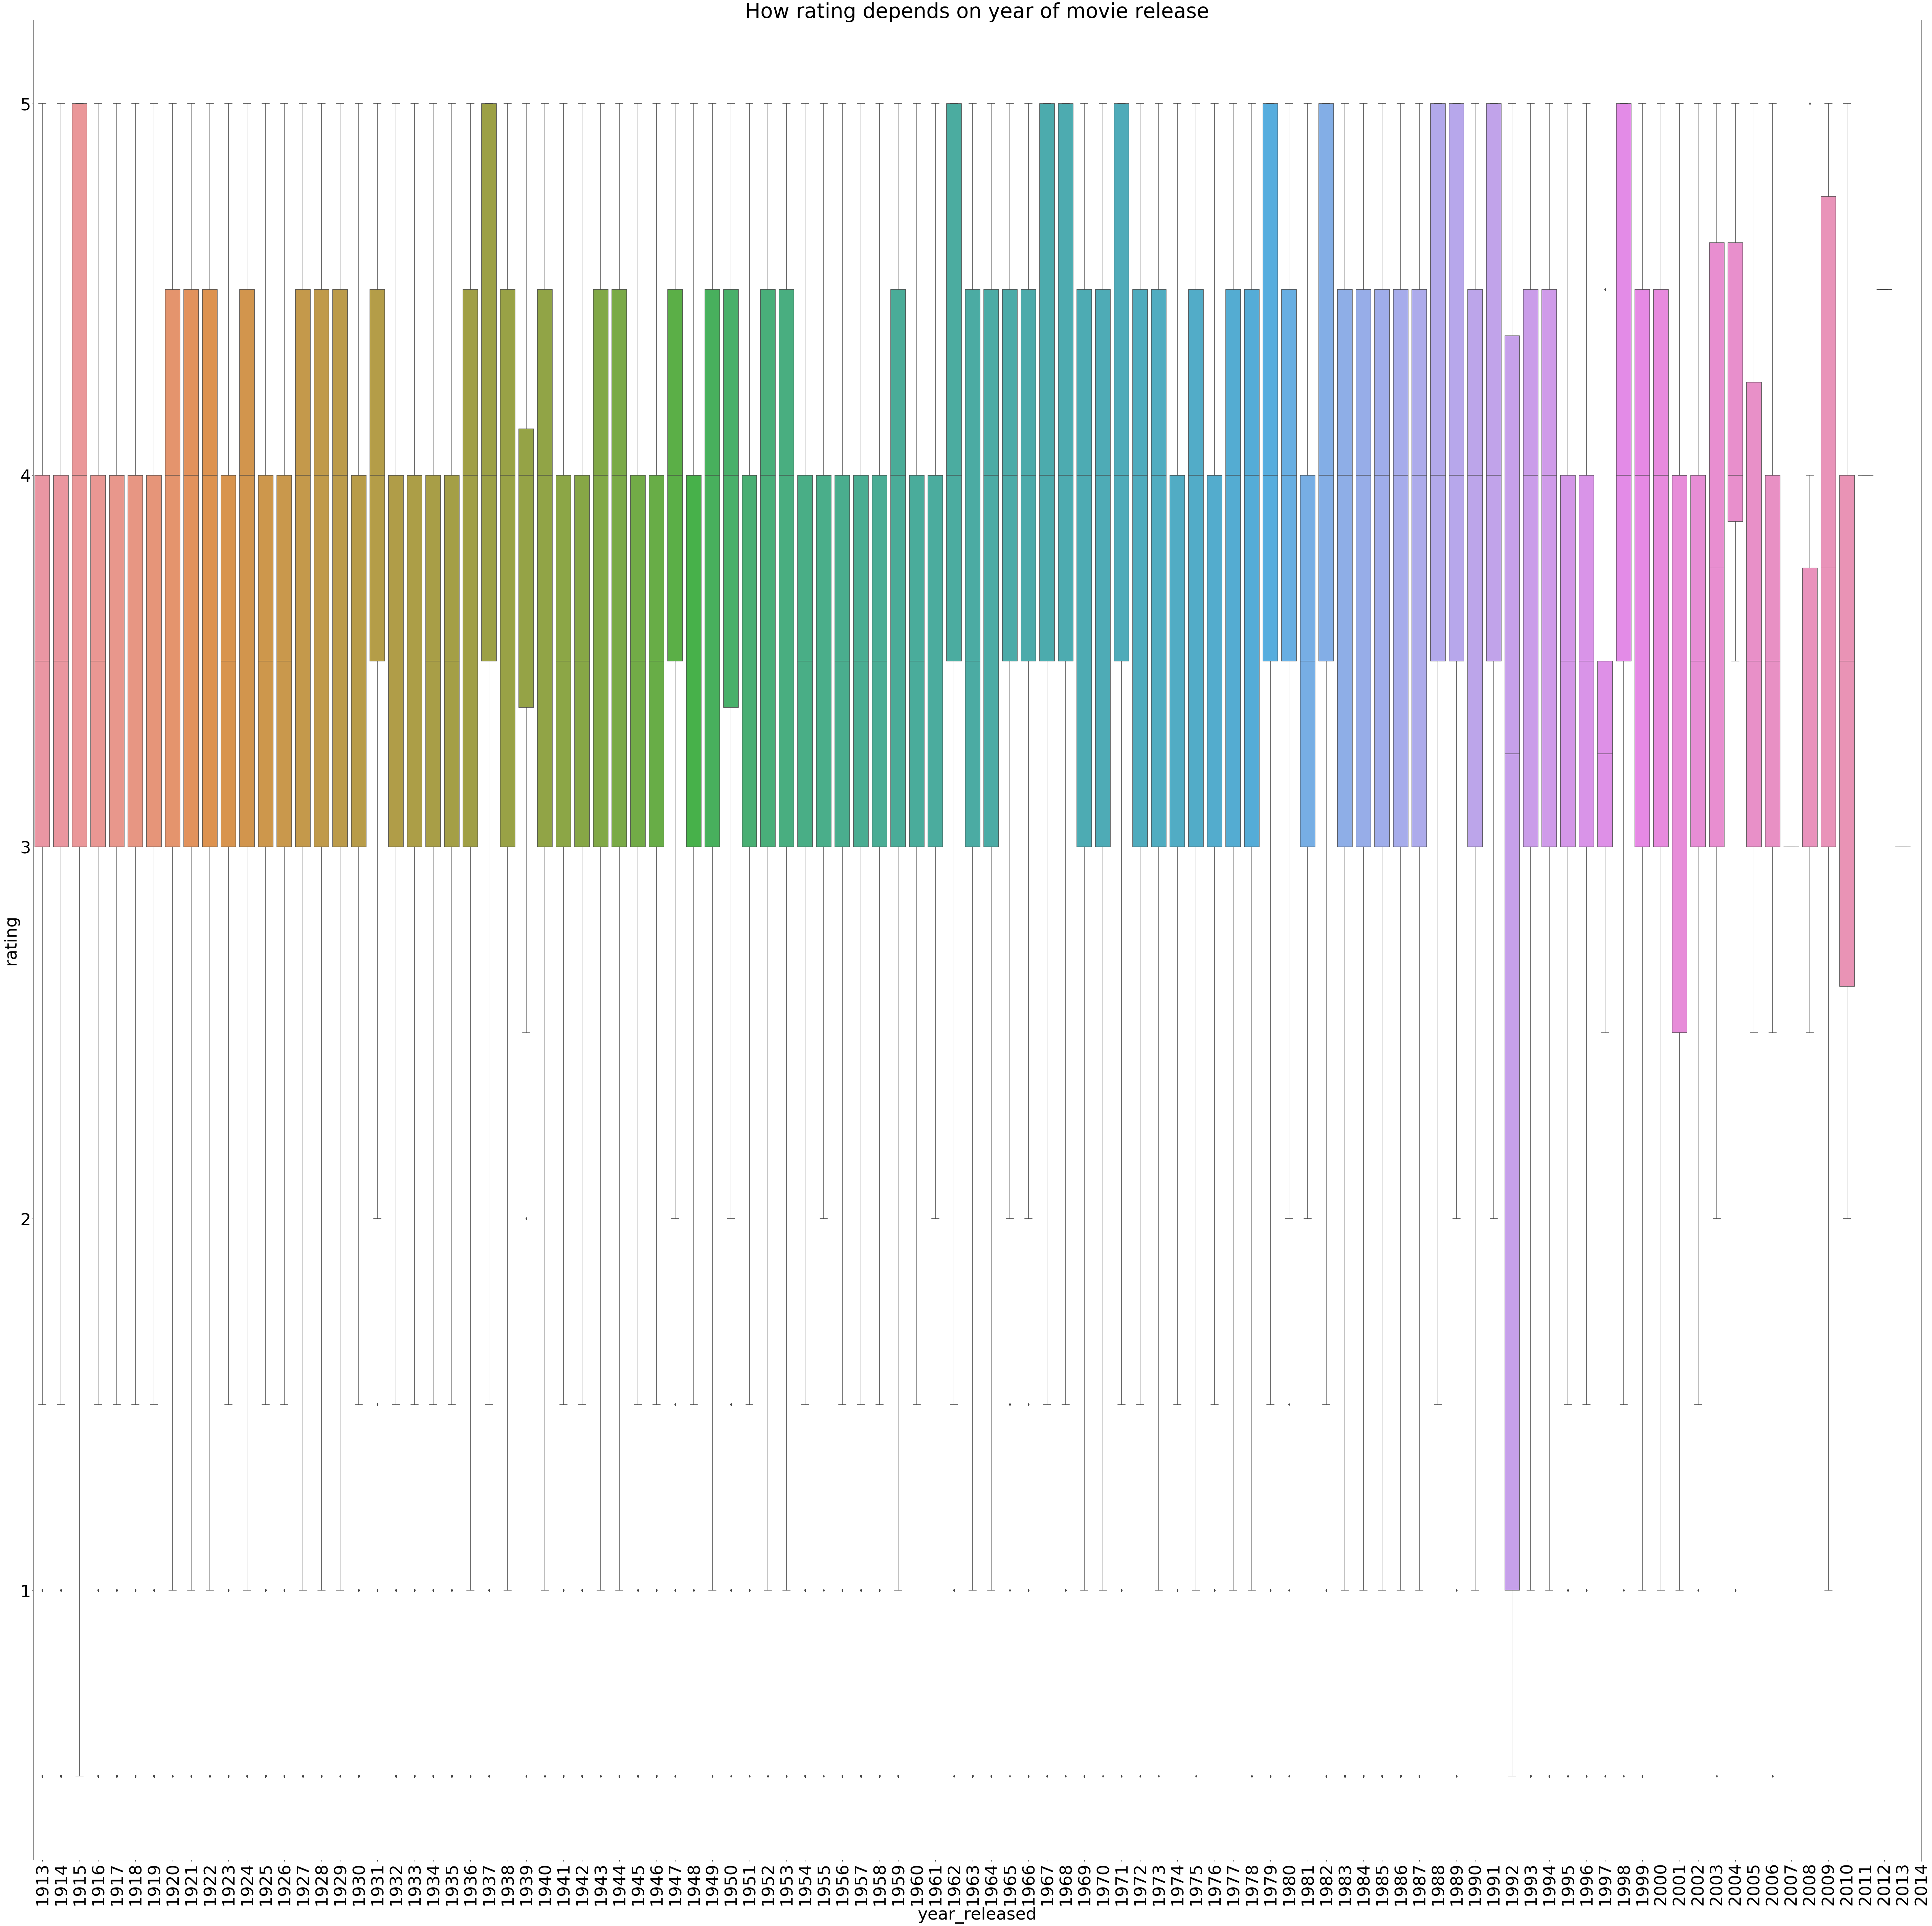

In [47]:
plt.figure(figsize = (100,100))
plt.rcParams.update({'font.size':50})
sns.boxplot(x ="year_released",y ="rating", data = train)
plt.xticks(rotation = 90)
x = np.arange(0,train["year_released"].unique().size)
plt.xticks(x, np.arange(1913, 2016))
plt.title("How rating depends on year of movie release")

In [48]:
#Confusions:
#1. Wtf. Why are there values in 1914, 1917, and 1918...perhaps these were just graphed bc I told funciton to?
#2. Honestly, really fucking hard to interpret...
#3. Rating based on year produced median around 3.5...some years its 4, which is really good.. examples include:1922, 1927, 1928.
#4. other years its 2.
#5. large iqr, for movies that have median ~4. why?

In [49]:
train.groupby("year_released")["rating"].mean().sort_values(ascending = False)

year_released
1918    4.500000
1957    4.025000
1917    4.000000
1944    3.992908
1925    3.987179
1935    3.970238
1974    3.963058
1946    3.954545
1942    3.926667
1938    3.925287
1941    3.922932
1954    3.922006
1972    3.921844
1934    3.906667
1951    3.889706
1952    3.875796
1975    3.866390
1977    3.854508
1964    3.852564
1960    3.843750
1926    3.843750
1948    3.842105
1962    3.825641
1958    3.805882
1969    3.805654
1967    3.800420
1931    3.792000
1953    3.788636
1950    3.788288
1949    3.785714
          ...   
1987    3.543578
2007    3.541038
1984    3.537018
1985    3.508496
2005    3.504980
1947    3.500000
2001    3.492167
1999    3.479110
1986    3.474862
1993    3.474573
2002    3.467784
2003    3.465541
1994    3.464535
1989    3.460990
1988    3.445131
1995    3.439229
1992    3.438211
1923    3.428571
1978    3.419575
1916    3.416667
1990    3.409341
1929    3.409091
2000    3.407020
1998    3.386103
1997    3.356484
1996    3.320064
2015    3.178571


In [50]:
train["year_released"].sort_values(ascending = True).unique()
# saw that from 103 supposed 1913-2015 years, 101 unique years including nan, 100 not including.
#years missing include 1914, 1917, 1918

array(['1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922',
       '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930',
       '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938',
       '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946',
       '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', nan], dtype=object)

In [51]:
np.sum(train.isna())

userId             0
movieId            0
rating             0
timestamp          0
title              0
genres             0
Action             0
Adventure          0
Animation          0
Children           0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
IMAX               0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
year_of_rating     0
month_of_rating    0
week_of_rating     0
year_released      6
dtype: int64

In [52]:
train.dropna(inplace = True)

# Step 3 Export

In [53]:
def add_dummy_columns(df):
    df = pd.concat([df, df["genres"].str.get_dummies()], axis = 1)
    return df
def add_time_columns(df):
    df["year_of_rating"] = df["timestamp"].dt.year
    df["month of rating"] = df["timestamp"].dt.month
    df["week_of_rating"] = df["timestamp"].dt.weekofyear
    return df
def add_movie_year(df):
    df["year_released"] = df["title"].str.extract("\((\d{4})\)")
    df.dropna(inplace = True)
    #only col that could have na...bc timestamp was valid...
    return df

In [54]:
def process_data_gm1(data):
    X = (
        data
        
        # Transform data
        .pipe(add_dummy_columns)
        .pipe(add_time_columns)
        
        .pipe(add_movie_year)
    )
    return X

In [55]:
test = process_data_gm1(test)
Path("data/part1").mkdir(parents=True, exist_ok=True)
data_file = Path("data/part1", "cleaned_data.hdf")
train.to_hdf(data_file, "train")
test.to_hdf(data_file,"test")